In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
excel_file = pd.ExcelFile('P1-SuperStoreUS-2015.xlsx')

In [3]:
data1 = pd.read_excel(excel_file, 'Orders')
data2 = pd.read_excel(excel_file, 'Returns')
data3 = pd.read_excel(excel_file, 'Users')

In [4]:
data1.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Ronnie Proctor,Delivery Truck,Home Office,Furniture,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Marcus Dunlap,Regular Air,Home Office,Furniture,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Gwendolyn F Tyson,Regular Air,Small Business,Furniture,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838
4,24846,Medium,0.08,3.28,2.31,14,Gwendolyn F Tyson,Regular Air,Small Business,Office Supplies,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-13,-24.0300,7,22.23,86838


In [5]:
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                1952 non-null   int64         
 1   Order Priority        1952 non-null   object        
 2   Discount              1952 non-null   float64       
 3   Unit Price            1952 non-null   float64       
 4   Shipping Cost         1952 non-null   float64       
 5   Customer ID           1952 non-null   int64         
 6   Customer Name         1952 non-null   object        
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [6]:
print(data2.isnull().sum())
print(data1.isnull().sum())

Order ID    0
Status      0
dtype: int64
Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64


In [7]:
numerical_columns = data1.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data1.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", categorical_columns)

Numerical Columns: ['Row ID', 'Discount', 'Unit Price', 'Shipping Cost', 'Customer ID', 'Product Base Margin', 'Postal Code', 'Profit', 'Quantity ordered new', 'Sales', 'Order ID']

Categorical Columns: ['Order Priority', 'Customer Name', 'Ship Mode', 'Customer Segment', 'Product Category', 'Product Sub-Category', 'Product Container', 'Product Name', 'Country', 'Region', 'State or Province', 'City']


In [8]:
# Fill missing values in numerical columns with the mode
data1[numerical_columns] = data1[numerical_columns].fillna(data1[numerical_columns].mode().iloc[0])

In [9]:
# Select relevant numerical columns for covariance and correlation analysis
numerical_columns = data1.select_dtypes(include=['number'])

# Compute covariance matrix
covariance_matrix = numerical_columns.cov()

# Compute correlation matrix
correlation_matrix = numerical_columns.corr()

print("Covariance Matrix:")
print(covariance_matrix)

print("\nCorrelation Matrix:")
print(correlation_matrix)

Covariance Matrix:
                            Row ID   Discount     Unit Price  Shipping Cost  \
Row ID                3.549295e+07   3.405028  -10377.341902   -1662.840953   
Discount              3.405028e+00   0.000985      -0.101272       0.021807   
Unit Price           -1.037734e+04  -0.101272  154827.534308    1362.195244   
Shipping Cost        -1.662841e+03   0.021807    1362.195244     303.269387   
Customer ID           3.783064e+05   0.451970   -3399.538743    -290.039124   
Product Base Margin   2.648948e-01   0.000063       1.410559       0.824025   
Postal Code           5.873912e+06 -23.261364  185857.674208  -17335.898146   
Profit               -2.615198e+05  -2.213585  -81749.374525      43.269440   
Quantity ordered new -4.701779e+04  -0.004091    -395.566035      -2.351589   
Sales                -3.947334e+06  -2.432777  446734.613007   14360.599351   
Order ID              1.042001e+08   9.990091   24669.582345   -4871.782078   

                       Customer 

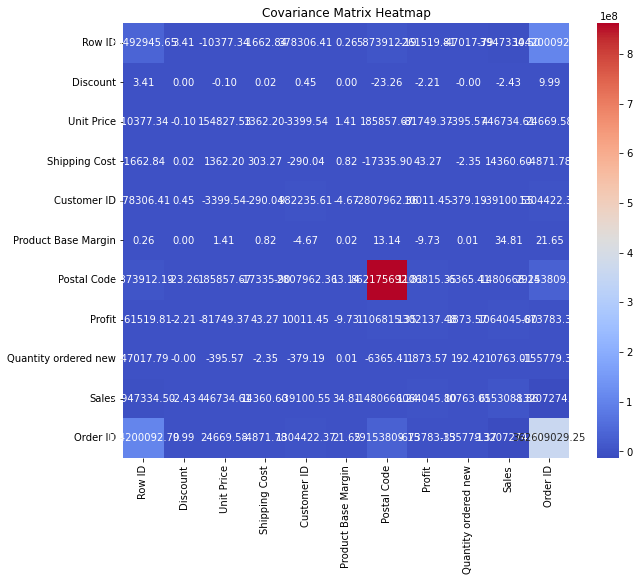

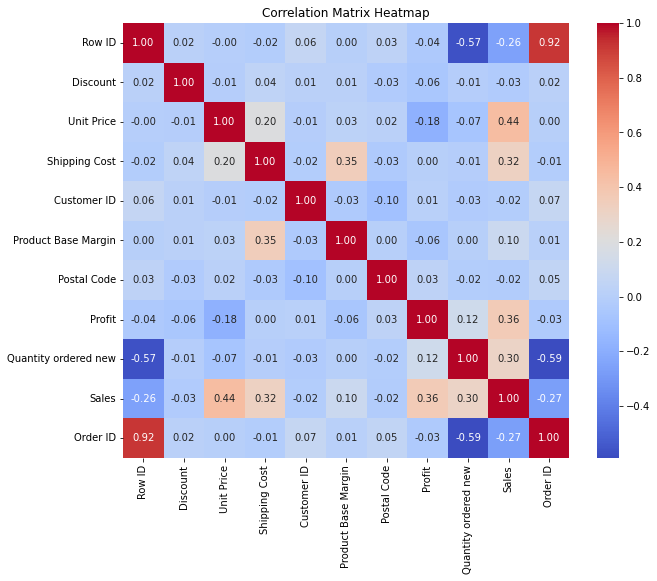

In [10]:
# Plot covariance matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Covariance Matrix Heatmap')
plt.show()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
#features
features = ['Discount', 'Sales', 'Profit','Unit Price', 'Shipping Cost','Product Base Margin','Quantity ordered new']
data = data1[features]

# Drop rows with missing values
data1.dropna(inplace=True)

# Split data into features and target variable
X = data1.drop(columns=['Profit'])
y = data1['Profit']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical variables
categorical_features = [ 'Product Sub-Category','Product Category'] #'Order Priority', 'Product Container','Ship Mode','Customer Segment',
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
])

# Define and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

# Predict profitability on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
#print("Mean Squared Error:", mse)

# Analyze coefficients to understand the impact of features on profitability
coefficients = model.named_steps['regressor'].coef_
intercept = model.named_steps['regressor'].intercept_
feature_names = ['Discount', 'Sales', 'Profit']  # 'Order Priority' is one-hot encoded, so it will have multiple coefficients

print("Intercept:", intercept)
print("Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(feature, ":", coef)


Intercept: 125.51233865068517
Coefficients:
Discount : 64.0175567602893
Sales : 284.3442482539409
Profit : -334.2547987054495
